# 4 Building Good Training Sets - Data Preprocessing

**Overview**

- [4.1 Dealing w/ missing data](#4.1-Dealing-w/-missing-data)
    - [4.1.1 Identifying missing values in tabular data](#4.1.1-Identifying-missing-values-in-tabular-data)
    - [4.1.2 Eliminating samples / features w/ missing values](#4.1.2-Eliminating-samples-/-features-w/-missing-values)
    - [4.1.3 Imputing missing val](#4.1.3-Imputing-missing-val)
    - [4.1.4 Understanding the scikit-learn estimator API](#4.1.4-Understanding-the-scikit-learn-estimator-API)
- [4.2 Handling categorical data](#4.2-Handling-categorical-data)
    - [4.2.1 Nominal & ordinal features](#4.2.1-Nominal-&-ordinal-features)
    - [4.2.2 Mapping ordinal feat](#4.2.2-Mapping-ordinal-feat)
    - [4.2.3 Encoding class labels](#4.2.3-Encoding-class-labels)
    - [4.2.4 Performing one-hot encoding on nominal features](#4.2.4-Performing-one-hot-encoding-on-nominal-features)
- [4.3 Partitioning a dataset into a separate training & test set](#4.3-Partitioning-a-dataset-into-a-separate-training-&-test-set)
- [4.4 Bringing feat onto the same scale](#4.4-Bringing-feat-onto-the-same-scale)
- [4.5 Selecting meaningful feat](#4.5-Selecting-meaningful-feat)
    - [4.5.1 L1 & L2 regularization as penalties against model coplexity](#4.5.1-L1-&-L2-regularization-as-penalties-against-model-coplexity)
    - [4.5.2 A geometric interpretation of L2 regularization](#4.5.2-A-geometric-interpretation-of-L2-regularization)
    - [4.5.3 Sparse solutions w/ L1-reguarization](#4.5.3-Sparse-solutions-w/-L1-reguarization)
    - [4.5.4 Sequential feat selection algorithms](#4.5.4-Sequential-feat-selection-algorithms)
- [4.6 Assessing feat importance w/ Random Forests](#4.6-Assessing-feat-importance-w/-Random-Forests)

In [1]:
from IPython.display import Image
%matplotlib inline

## 4.1 Dealing w/ missing data

**Missing val**:
`NaN` (Not a Number), `NULL`

### 4.1.1 Identifying missing values in tabular data

In [2]:
import pandas as pd
from io import StringIO

# sample data
csv_data = '''A,B,C,D
            1.0,2.0,3.0,4.0
            5.0,6.0,,8.0
            10.0,11.0,12.0,'''

# Python 2.7
# csv_data = unicode(csv_data)

# read data
df = pd.read_csv(StringIO(csv_data))
df

A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN

`isnull()`

In [3]:
# count missing val in features 
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

> ---
> 
> `.values`

In [4]:
df.values

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,  nan,   8.],
       [ 10.,  11.,  12.,  nan]])

> ---

### 4.1.2 Eliminating samples / features w/ missing values

In [5]:
# remove rows that contain missing val
# df.dropna()
df.dropna(axis=0)

A    B    C    D
0  1.0  2.0  3.0  4.0

In [6]:
# remove columns that contain missing val
df.dropna(axis=1)

A     B
0   1.0   2.0
1   5.0   6.0
2  10.0  11.0

In [7]:
# only drop rows where all columns are NaN
df.dropna(how='all')

A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN

In [8]:
# drop rows that have less than 3 real val
df.dropna(thresh=4)

A    B    C    D
0  1.0  2.0  3.0  4.0

In [9]:
# only drop rows where NaN appear in specific columns (column C)
df.dropna(subset=['C'])

A     B     C    D
0   1.0   2.0   3.0  4.0
2  10.0  11.0  12.0  NaN

### 4.1.3 Imputing missing val

**Mean imputation** (平均値補完):
`Imputer`

In [10]:
from sklearn.preprocessing import Imputer

# instance
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
# fit data
imr = imr.fit(df.values)

# imputing
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

col 毎に, mean に置換


In [11]:
# strategy: median
imr_med = Imputer(missing_values='NaN', strategy='median', axis=0)
imr_med = imr_med.fit(df.values)
imputed_data_med = imr_med.transform(df.values)
imputed_data_med

# strategy: most frequent
imr_freq = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imr_freq = imr_freq.fit(df.values)
imputed_data_freq = imr_freq.transform(df.values)
imputed_data_freq

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,   3.,   8.],
       [ 10.,  11.,  12.,   4.]])

### 4.1.4 Understanding the scikit-learn estimator API

```
sklearn
├── transformer class
│   ├── fit method
│   └── transform method
└── estimator class
```

- **tranformer** class
    - `fit` method
        : training data -> learning parameter
    - `transform` method
        : training/test data -> 
        - `Imputer`  
- **estimator** class
    - `predict` method

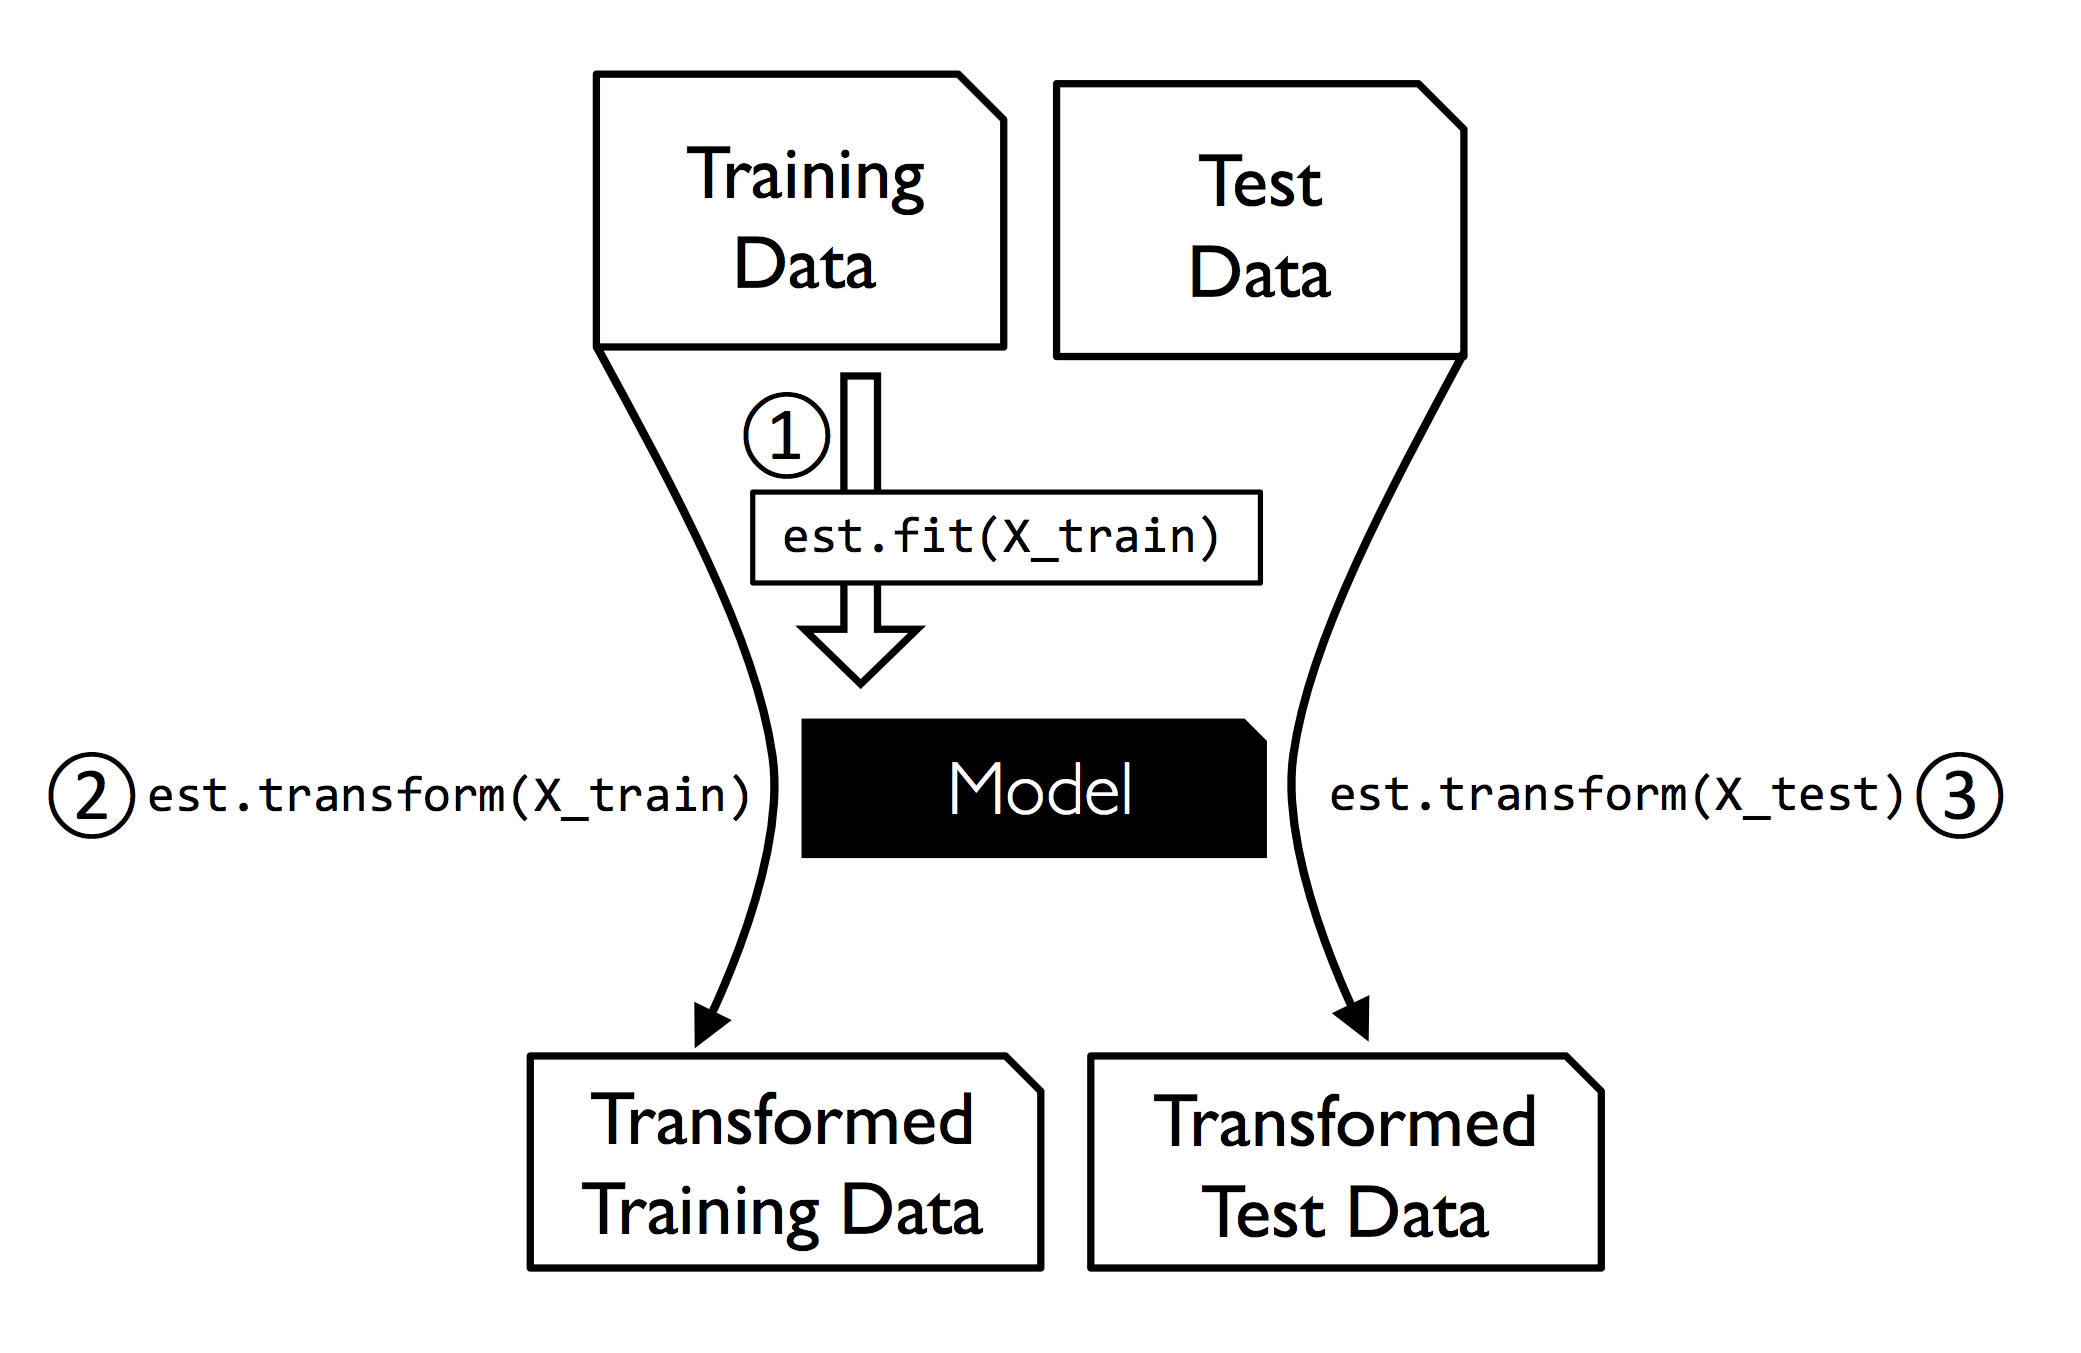

In [12]:
Image('img/04_01.png', width=500)

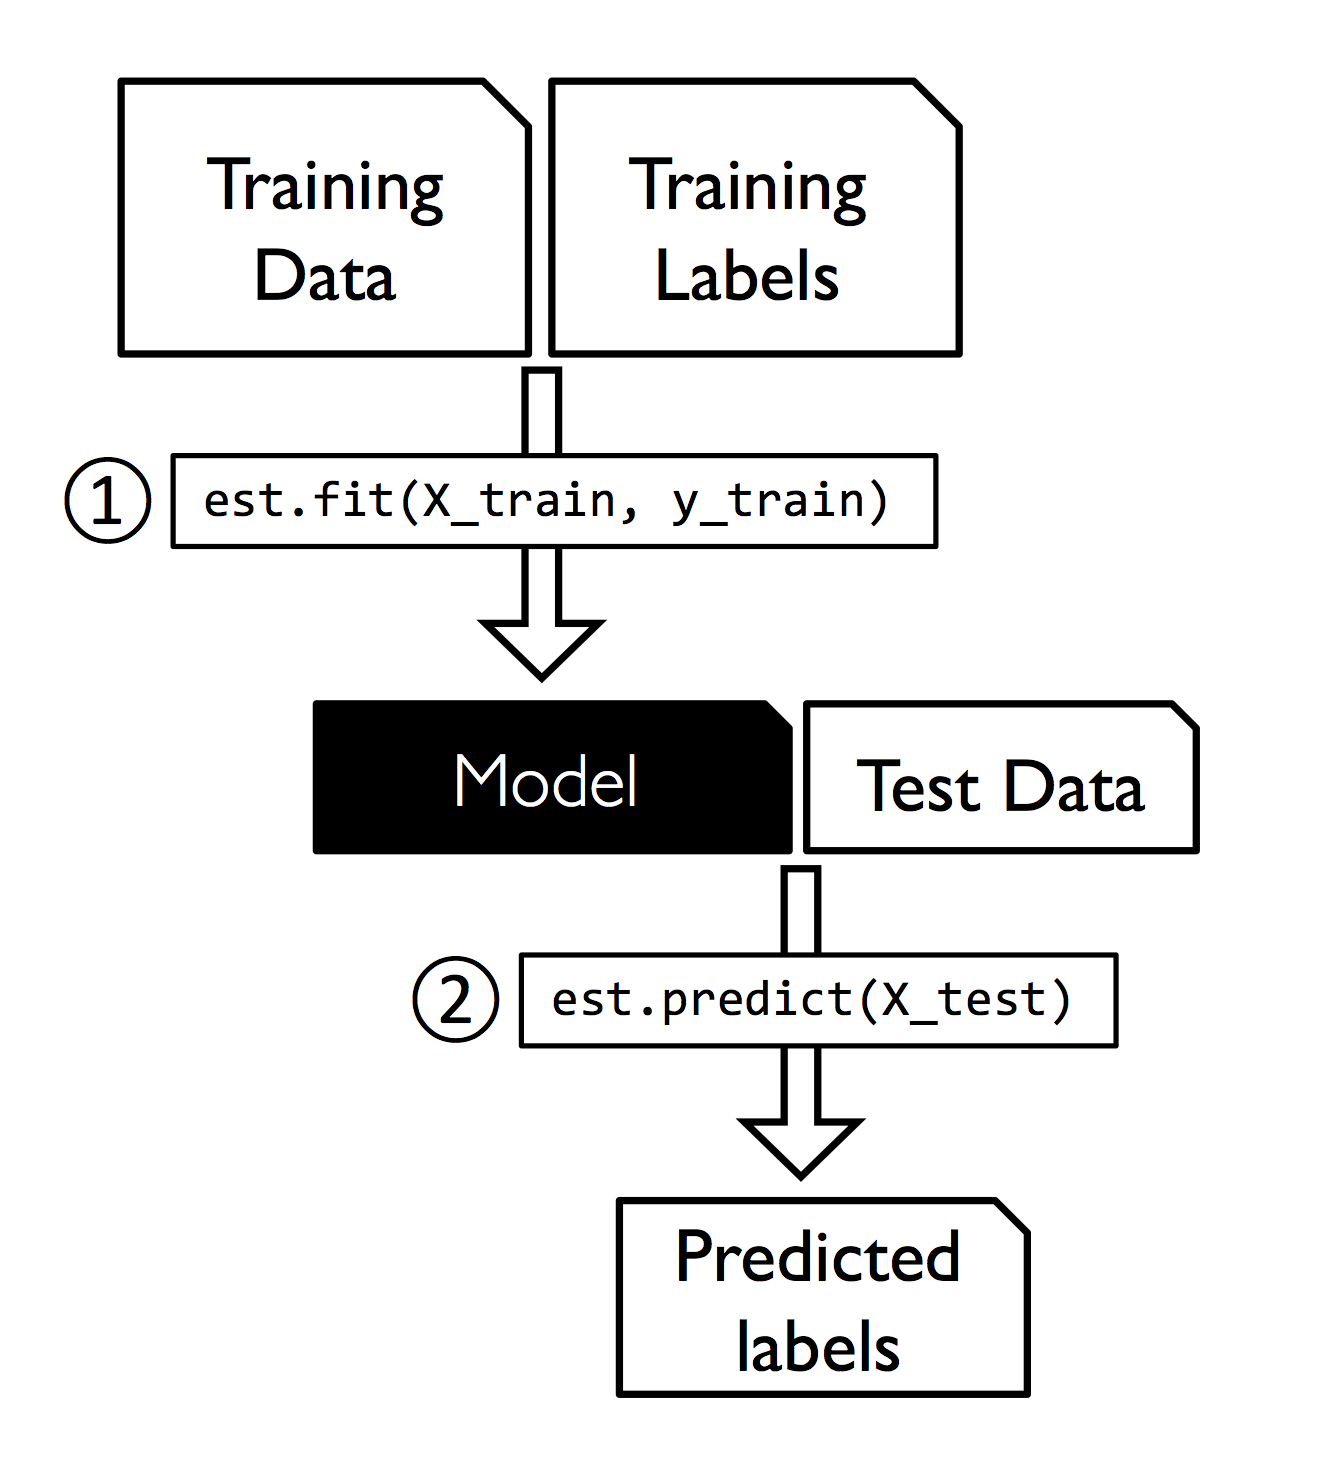

In [13]:
Image('img/04_02.png', width=500)

## 4.2 Handling categorical data

### 4.2.1 Nominal & ordinal features

- **Nominal** feat
    - e.g., Red, Green, Blue
- **Ordinal** feat
    - e.g., XL > L > M

#### Sample data 

In [14]:
import pandas as pd

# sample data 
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']])

# column name 
df.columns = ['color', 'size', 'price', 'classlabel']
df

color size  price classlabel
0  green    M   10.1     class1
1    red    L   13.5     class2
2   blue   XL   15.3     class1

### 4.2.2 Mapping ordinal feat

In [15]:
# T shirt size int
size_mapping = {'XL': 3, 'L': 2, 'M': 1}
# convert size to int
df['size'] = df['size'].map(size_mapping)

df

color  size  price classlabel
0  green     1   10.1     class1
1    red     2   13.5     class2
2   blue     3   15.3     class1

In [16]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

### 4.2.3 Encoding class labels

In [17]:
import numpy as np
# class label, int を対応させる dictionay
class_mapping = {label:idx for idx, label in
                enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [18]:
# class label converted into int 
df['classlabel'] = df['classlabel'].map(class_mapping)
df

color  size  price  classlabel
0  green     1   10.1           0
1    red     2   13.5           1
2   blue     3   15.3           0

In [19]:
# int, classlabel 対応させる dictionary を生成
inv_class_mapping = {v: k for k, v in class_mapping.items()}

# int -> class label
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

color  size  price classlabel
0  green     1   10.1     class1
1    red     2   13.5     class2
2   blue     3   15.3     class1

In [20]:
from sklearn.preprocessing import LabelEncoder

# label encoder の instance を生成
class_le = LabelEncoder()
# classlabel -> int
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [21]:
# class label -> string
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

### 4.2.4 Performing one-hot encoding on nominal features

In [22]:
# T shirt: color, size, price
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

$
\begin{cases}
blue &\quad \rightarrow &\quad 0\\
green &\quad \rightarrow &\quad 1\\
red &\quad \rightarrow &\quad 2
\end{cases}
$


blue < green < red ではない

**one-hot encoding**:
- nominal feat のcol の一意な値ごとに, **Dummy feat** を新たに作成
- e.g., blue sample:

$
\begin{cases}
blue &\quad = &\quad 1\\
green &\quad = &\quad 0\\
red &\quad = &\quad 0
\end{cases}
$

In [23]:
from sklearn.preprocessing import OneHotEncoder

# one-hot encoder
ohe = OneHotEncoder(categorical_features=[0])
# exe: one-hot encoding 
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

`toarray`

- 密行列: 0以外の要素からなるmat
- 疎行列: 

`OneHotEncoder(..., sparse=False)`

In [24]:
# one-hot encoding
pd.get_dummies(df[['price', 'color', 'size']])

price  size  color_blue  color_green  color_red
0   10.1     1           0            1          0
1   13.5     2           0            0          1
2   15.3     3           1            0          0

**Multicolinearity** (多重共線性)
- feat の相関性が高い場合, inv mat の計算は計算量が多すぎて, 数値的に不安定な予測につながる
- feat colの1つを削除することで対応; color_blueを削除しても情報は失われない

In [25]:
# one-hot encoding 
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

price  size  color_green  color_red
0   10.1     1            1          0
1   13.5     2            0          1
2   15.3     3            0          0

In [26]:
# one-hot encoder
ohe = OneHotEncoder(categorical_features=[0])
# one-hot encoding
ohe.fit_transform(X).toarray()[:, 1:]

array([[  1. ,   0. ,   1. ,  10.1],
       [  0. ,   1. ,   2. ,  13.5],
       [  0. ,   0. ,   3. ,  15.3]])

## 4.3 Partitioning a dataset into a separate training & test set


- ref6: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

In [27]:
# read datasets
df_wine = pd.read_csv('~/Developer/PyMLBook2e/code/ch04/wine.data',
                     header=None)

# col name
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

# class label
print('Class label', np.unique(df_wine['Class label']))

# head
df_wine.head()

Class label [1 2 3]


Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [28]:
from sklearn.model_selection import train_test_split

# feat, class label を抽出
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# training, test data 
# test data: 30% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

- `stratify`: 層化samplingのために, class label を指定; training と test をのclass の比率が元のdataset と同じに

## 4.4 Bringing feat onto the same scale

**Feature scaling** 
- **Normalization** (正規化)
- **Standardization** (標準化)

###### Normalization

<!--xnorm(i) = ( x(i) - xmin ) / ( xmax - xmin )-->
$$x_{norm}^{(i)} =  \frac{(x^{(i)} - x_{min})}{(x_{max} - x_{min})}$$
(4.4.1)

In [29]:
from sklearn.preprocessing import MinMaxScaler

# min-max scaling のinstance を生成
mms = MinMaxScaler()

# training data scaling
X_train_norm = mms.fit_transform(X_train)

# test data 
X_test_norm = mms.transform(X_test)

###### Standardization
<!--xstd(i) = ( x(i) - μx ) / σx-->
$$x_{std}^{(i)} = \frac{x^{(i)} - \mu_x}{\sigma_x}$$
(4.4.2)
    
- $\mu_x$: mean
- $\sigma_x$: SD

In [30]:
ex = np.array([0, 1, 2, 3, 4, 5])

print('standardization:', (ex - ex.mean()) / ex.std())

print('normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

standardization: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [ 0.   0.2  0.4  0.6  0.8  1. ]


In [31]:
from sklearn.preprocessing import StandardScaler

# standardized instance 生成 (mean=0, SD=1 に変換)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## 4.5 Selecting meaningful feat

generalization error 汎化誤差 を減らすために,
- 多くのtraining data
- 正則化を通じて, 複雑さにpenalty を科す
- parameter の数が少ない, 単純なmodel を選択
- data の次元を減らす

### 4.5.1 L1 & L2 regularization as penalties against model coplexity

###### L2 reg

<!--||w||2,2 = Σwj^2-->

$$||w||^2_2 = \sum_{j=1}^m w^2_j$$
(4.5.1)

###### L1 reg

<!--||w||1 = Σ|wj|-->
$$||w||_1 = \sum_{j=1}^m |w_j|$$
(4.5.2)

### 4.5.2 A geometric interpretation of L2 regularization

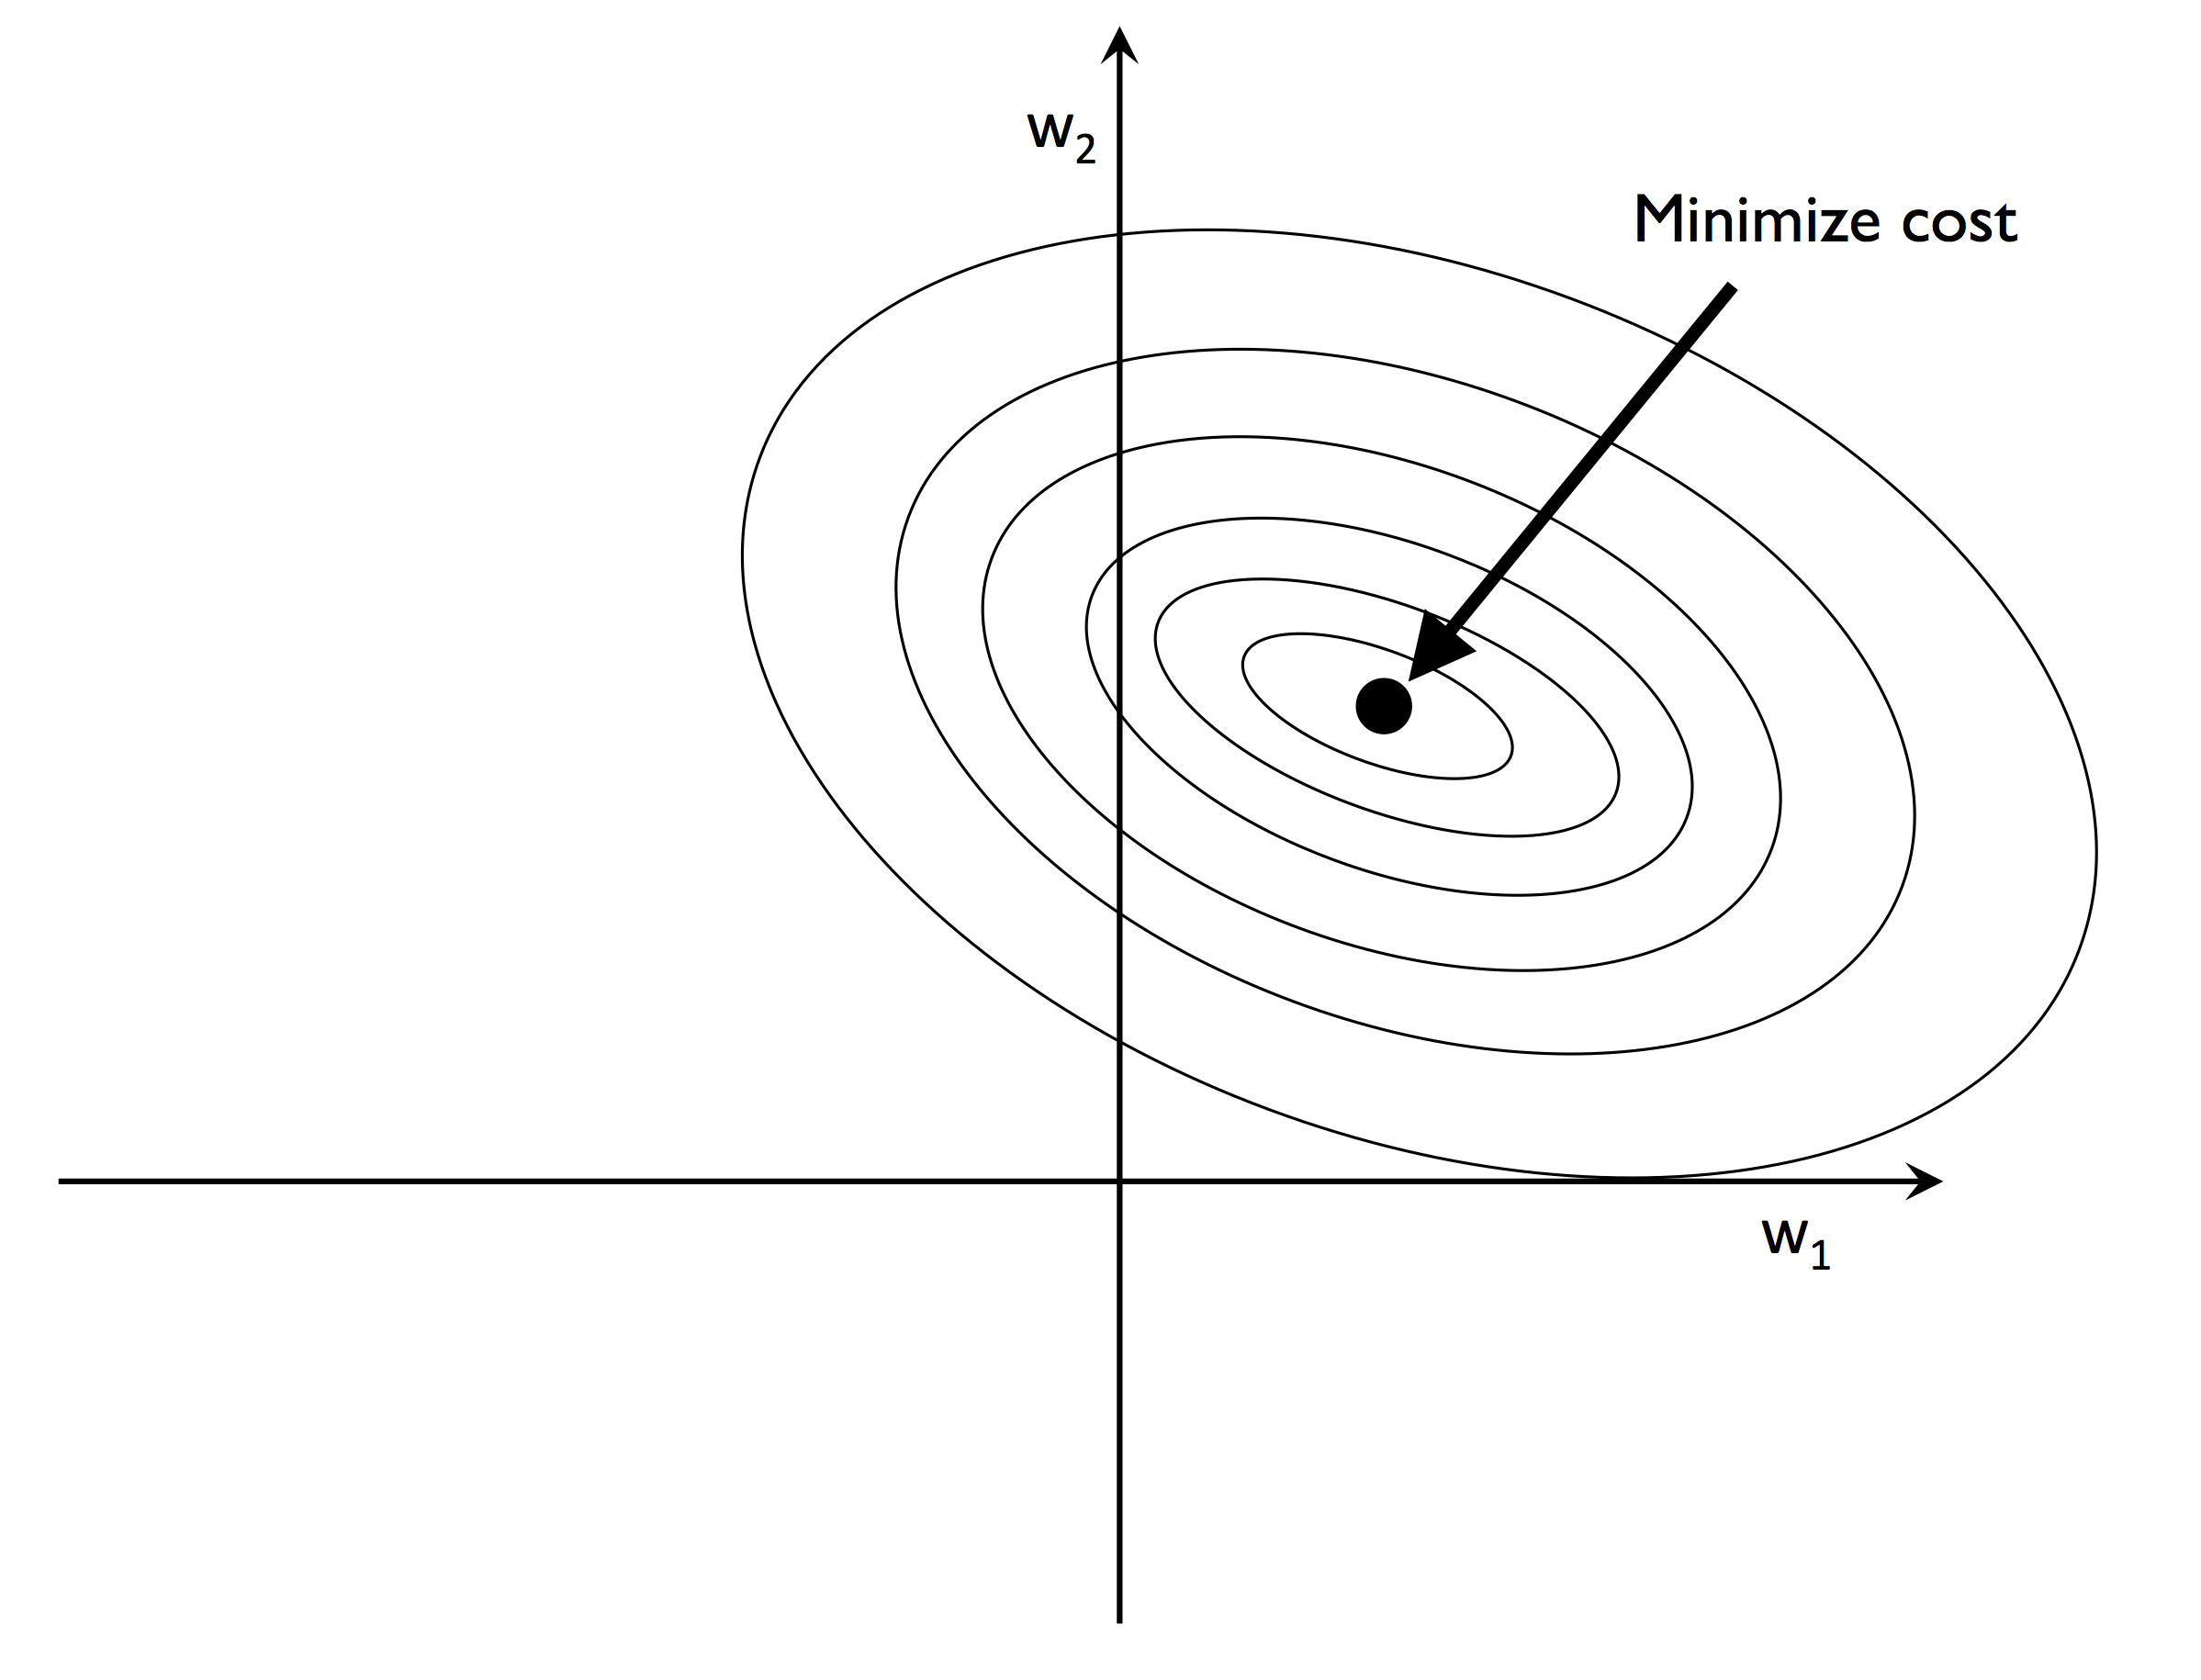

In [32]:
Image('img/04_04.png', width=500)

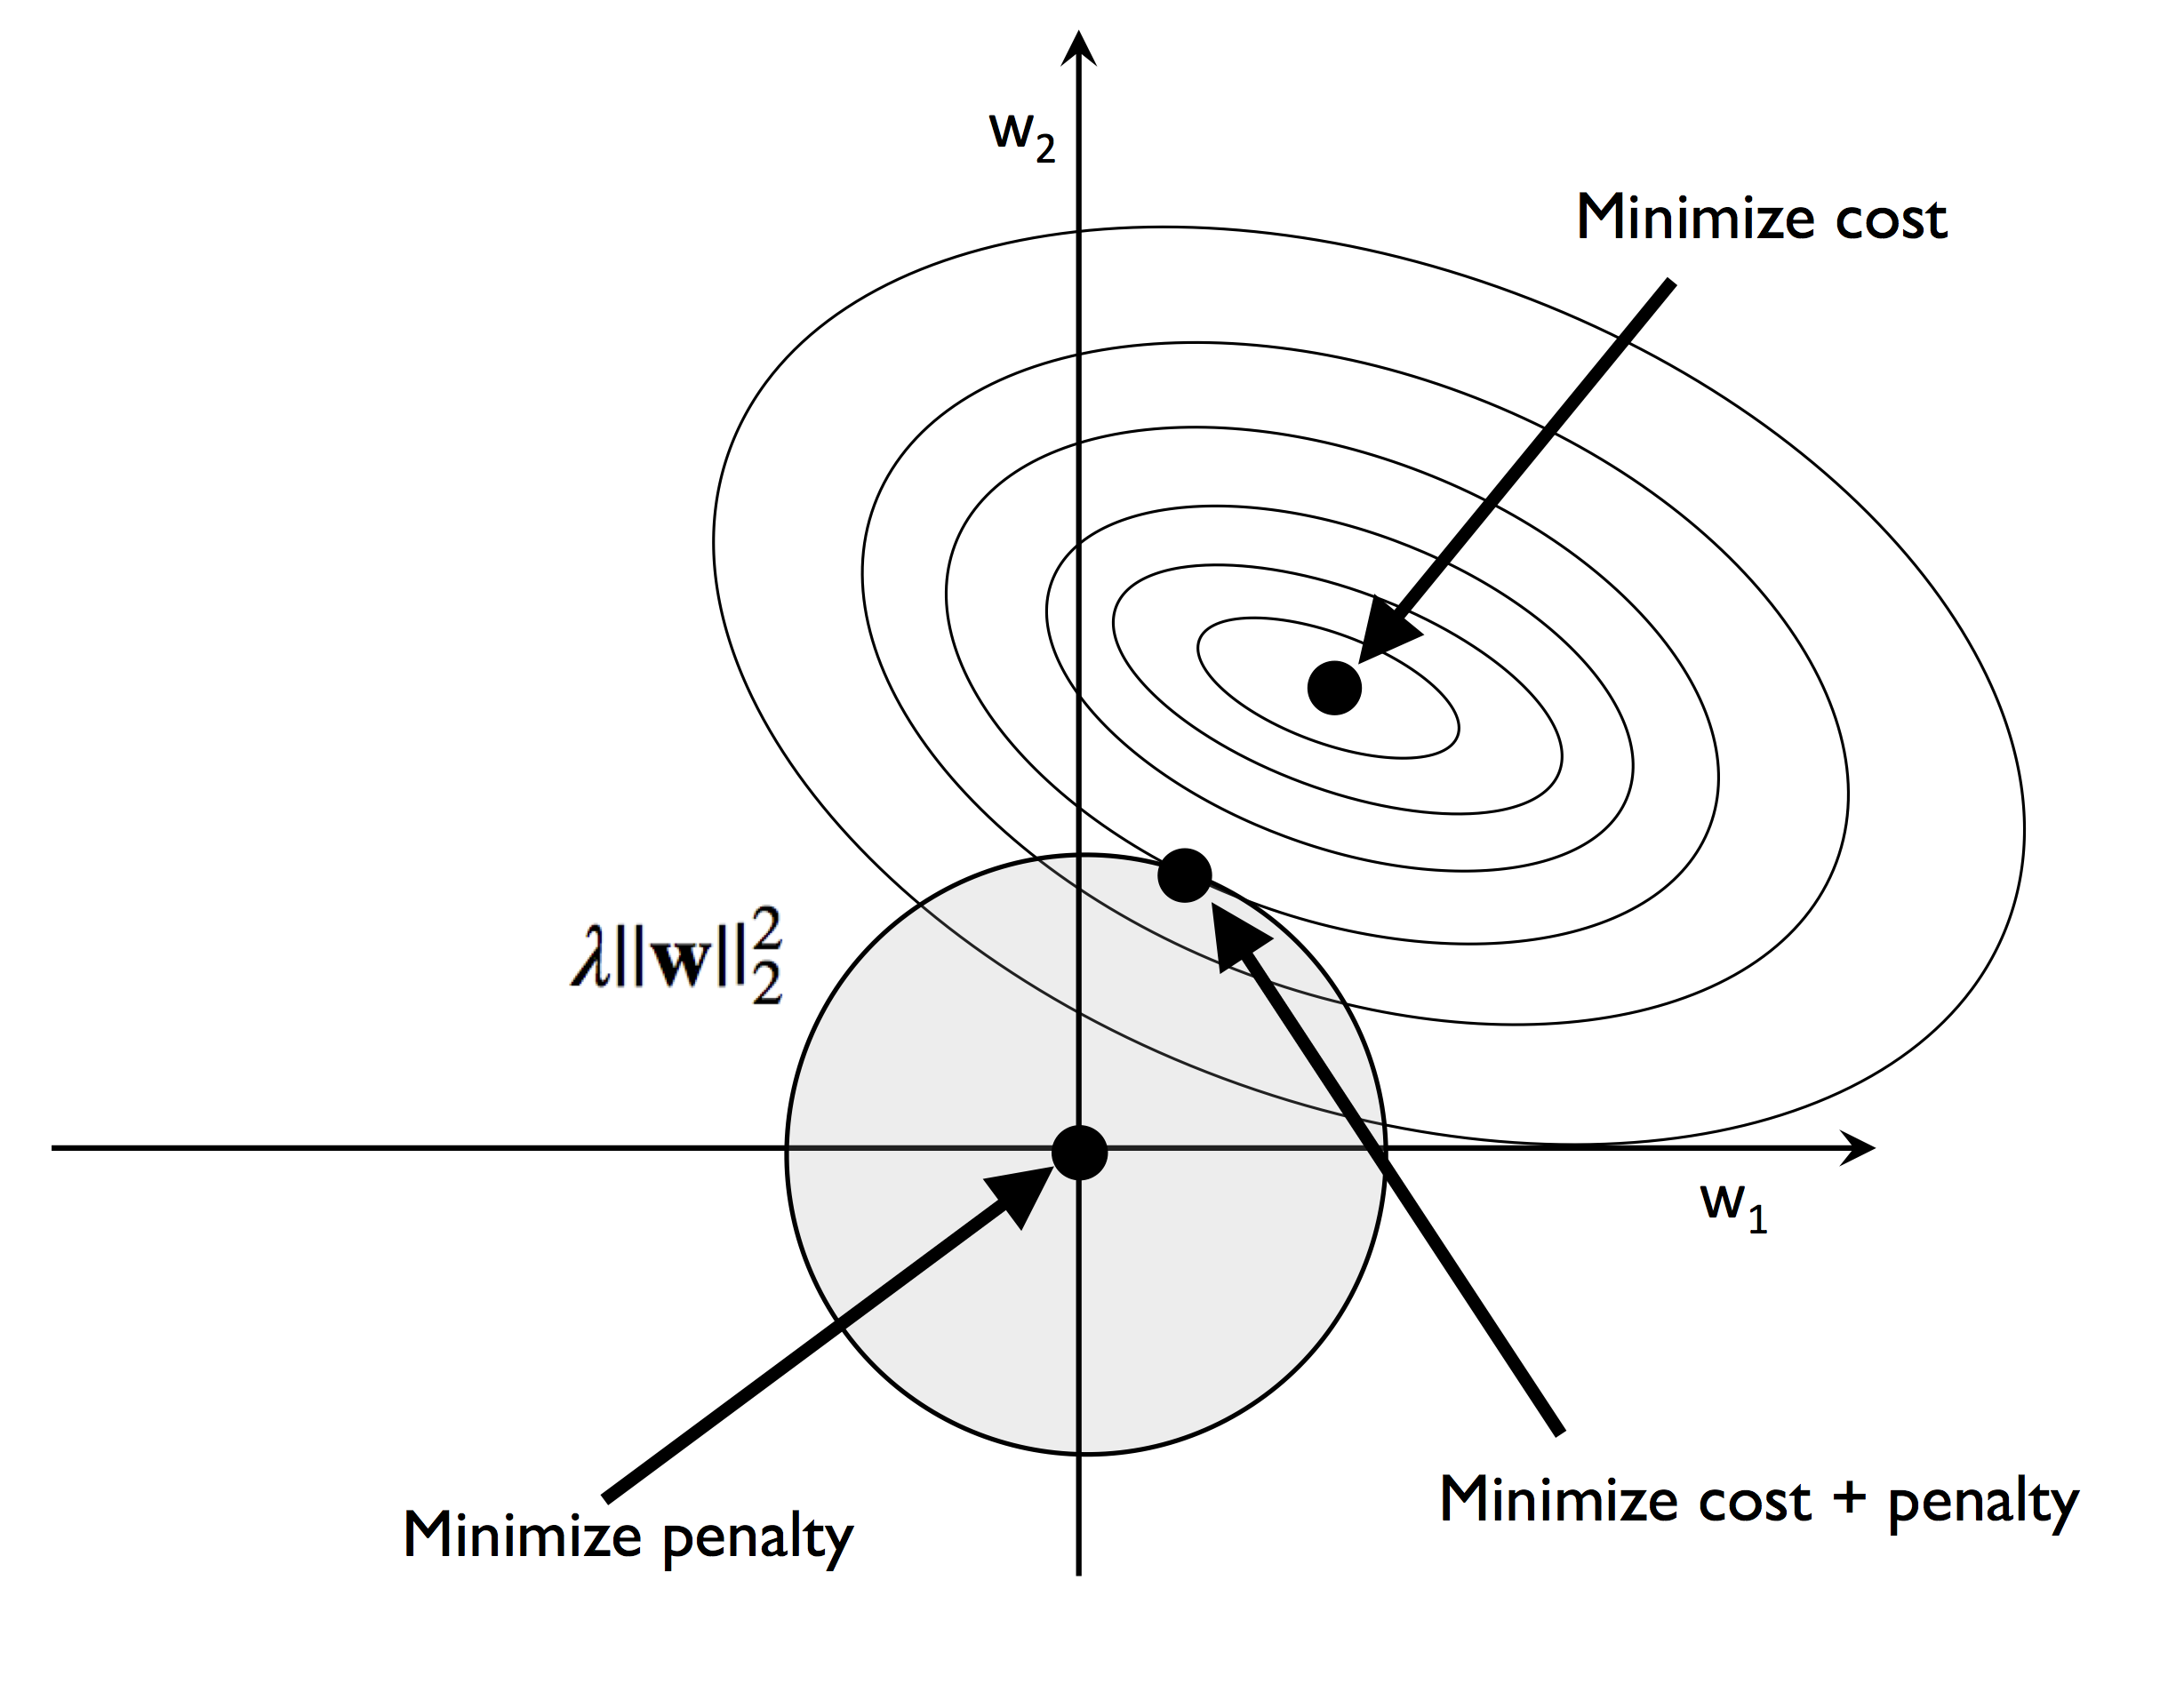

In [33]:
Image('img/04_05.png', width=500)

### 4.5.3 Sparse solutions w/ L1-reguarization

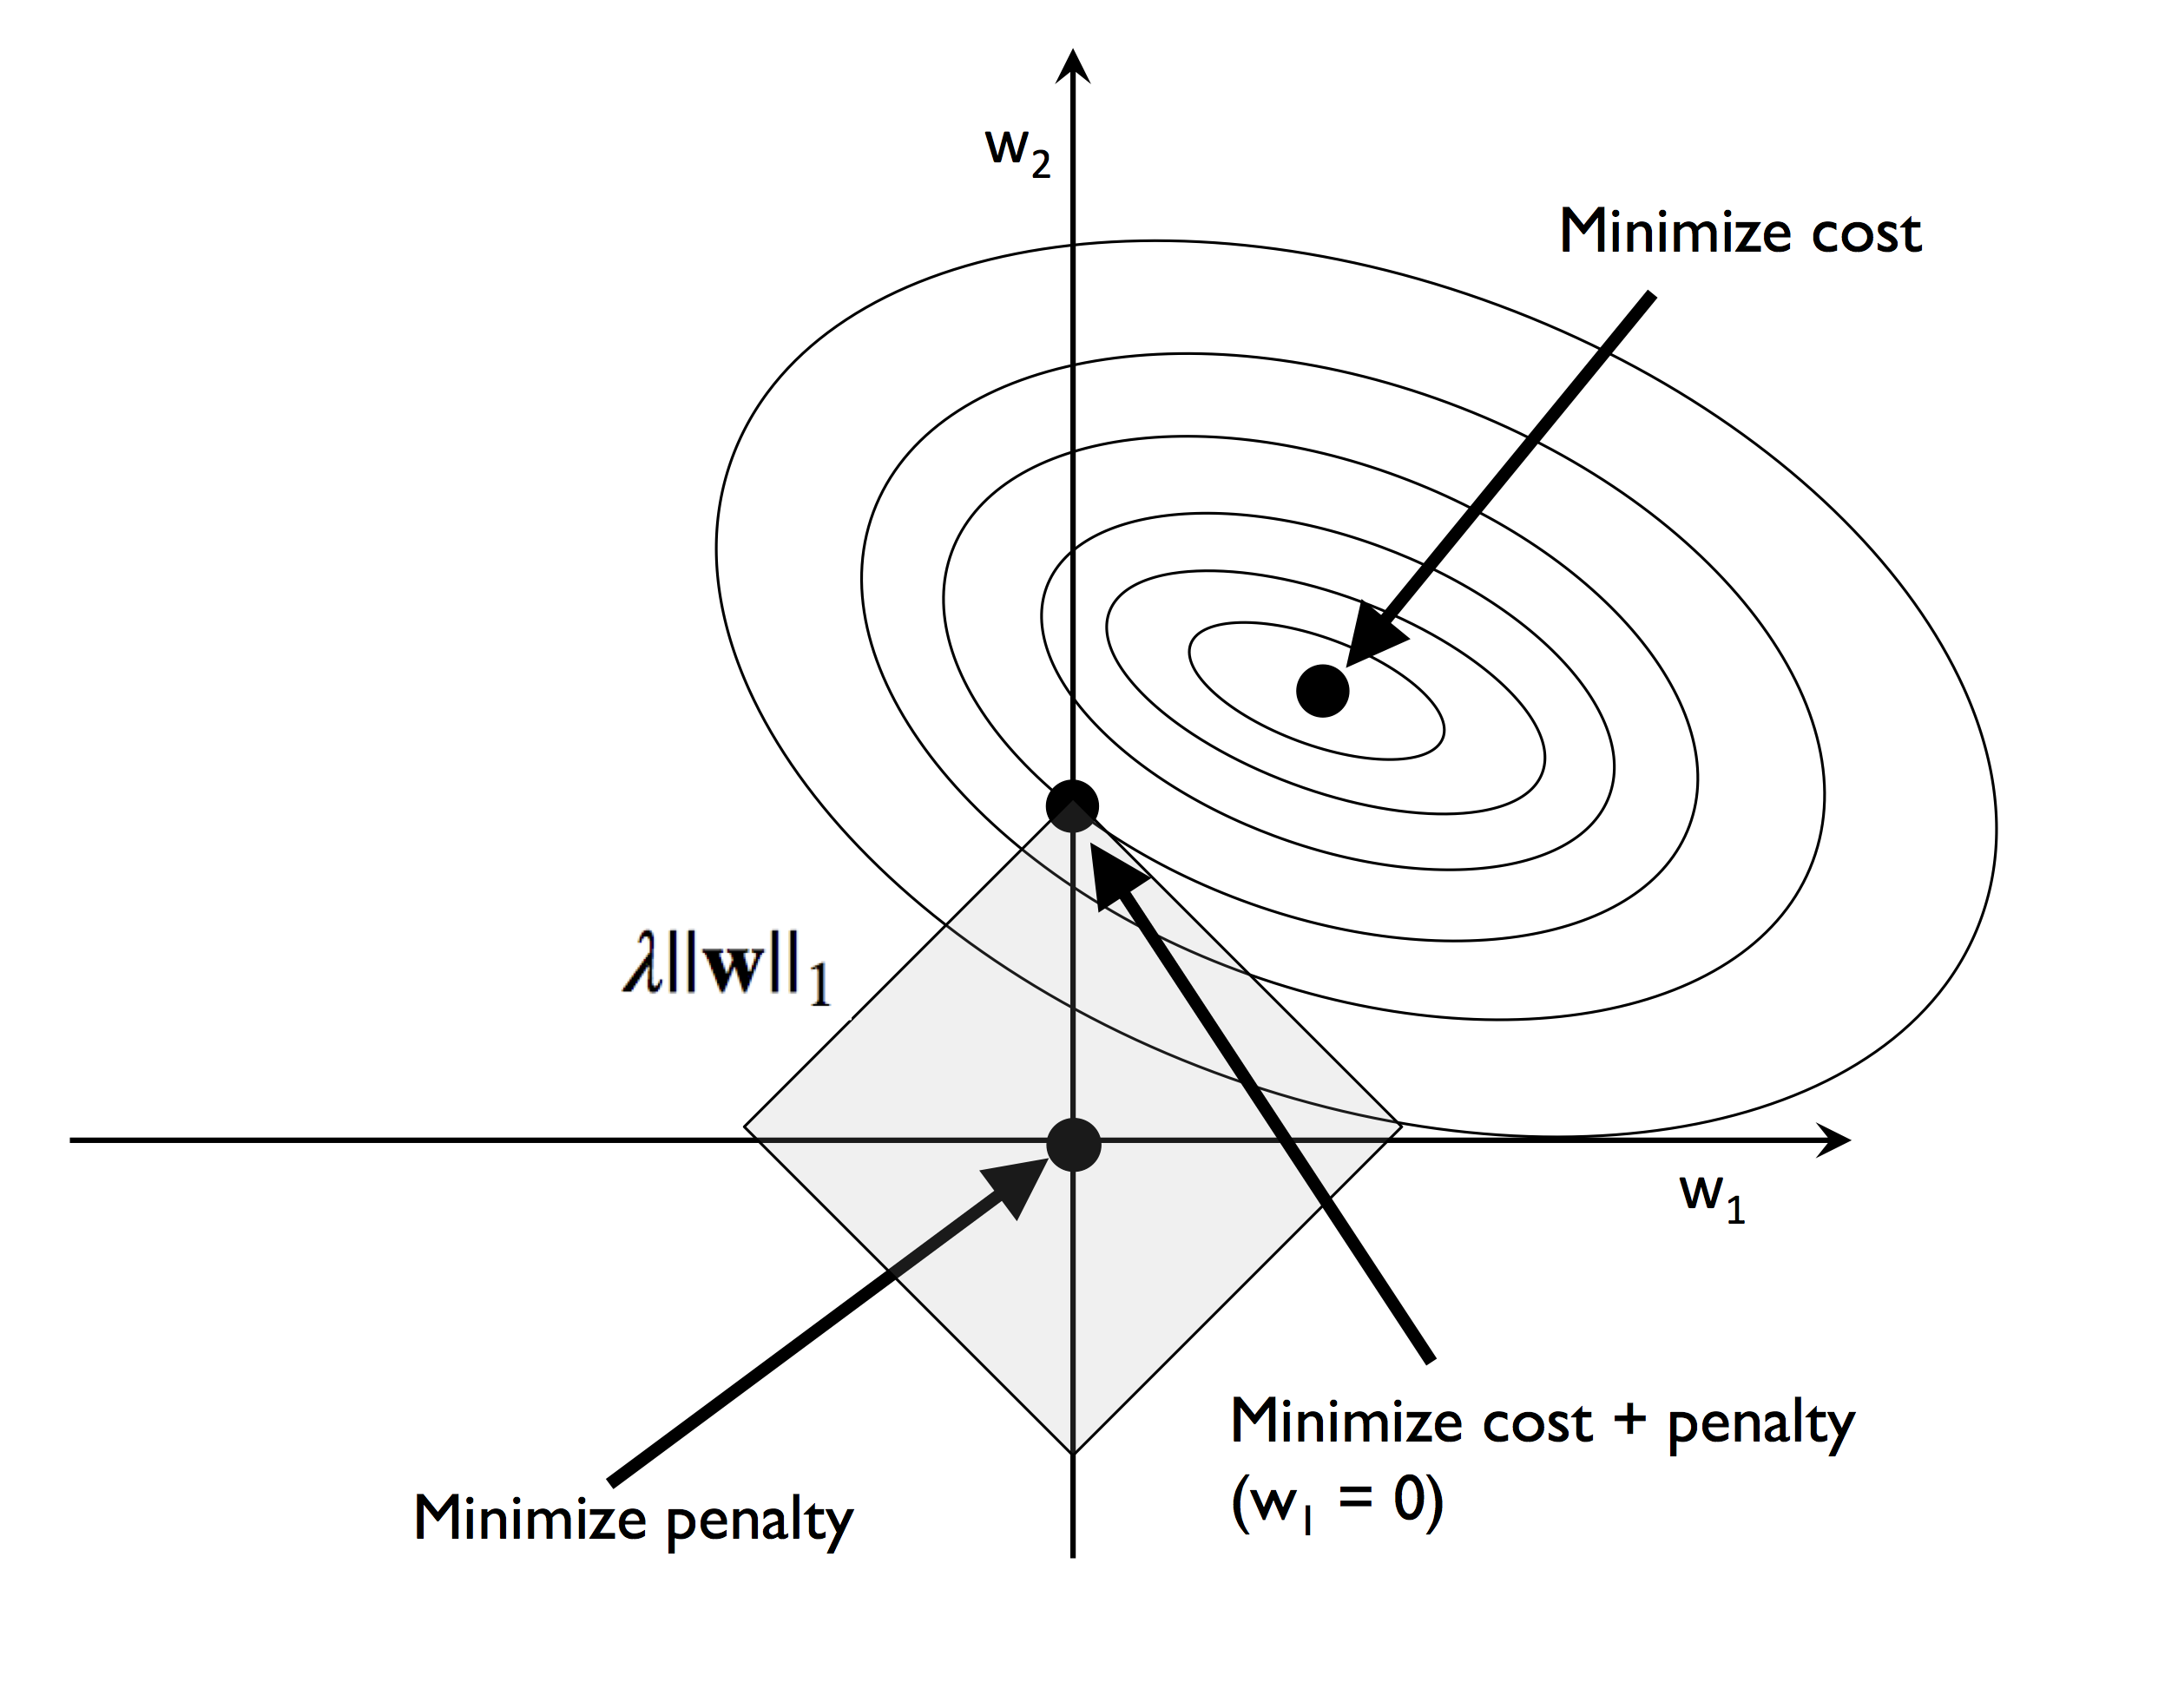

In [34]:
Image('img/04_06.png', width=500)

- ref [The Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)



In [35]:
from sklearn.linear_model import LogisticRegression

# L1 正則化 log reg の instance を生成
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
# L1 正則化log reg の instance を生成 (逆正則化parameter c=1.0)
lr = LogisticRegression(penalty='l1', C=1.0)

# fit training data
lr.fit(X_train_std, y_train)

# training data に対する accuracy
print('Training accuracy:', lr.score(X_train_std, y_train))

print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [37]:
# display intercept
lr.intercept_

array([-1.26334792, -1.21592429, -2.37043843])

In [38]:
# display weight coef 
lr.coef_

array([[ 1.24532969,  0.18003014,  0.74632937, -1.16364931,  0.        ,
         0.        ,  1.15757635,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55816799,  2.5087889 ],
       [-1.53745196, -0.38727164, -0.99535473,  0.364924  , -0.05937555,
         0.        ,  0.66806872,  0.        ,  0.        , -1.93410823,
         1.2340145 ,  0.        , -2.23171298],
       [ 0.13558276,  0.16860198,  0.35714862,  0.        ,  0.        ,
         0.        , -2.43762953,  0.        ,  0.        ,  1.56355187,
        -0.81869698, -0.4926638 ,  0.        ]])



$$z = w_0 x_0 + w_1 x_1 + ... + w_m x_m\\
= \sum_{j=0}^m x_j w_j\\
= w^T x$$
(4.5.3)



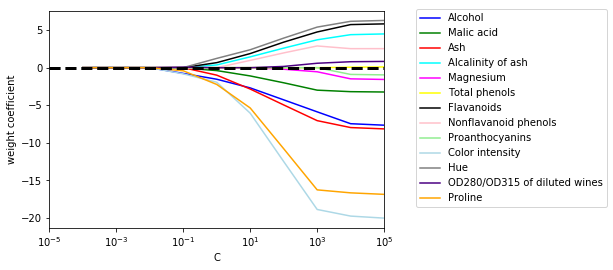

In [39]:
import matplotlib.pyplot as plt

# prepare fig
fig = plt.figure()
ax = plt.subplot(111)

# color list
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black',
         'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']

# empty list (weight coef, 逆正則化parameter)
weights, params = [], []

# 逆正則化parameter のval ごとに処理
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
# weight coef -> NumPy
weights = np.array(weights)

# plot: weight coef
for column, color in zip(range(weights.shape[1]), colors):
    # x axis: 逆正則化param; y axis: weight coef
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1], color=color)

# y=0 black, break line
plt.axhline(0, color='black', linestyle='--', linewidth=3)

# x axis lim
plt.xlim([10**(-5), 10**5])

# axis label
plt.ylabel('weight coefficient')
plt.xlabel('C')

# x axis scale
plt.xscale('log')

plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

### 4.5.4 Sequential feat selection algorithms

**Dimension reduction**
- **Feature selection** (特徴選択):
    - feat の一部を選択
- **Feature extraction** (特徴抽出):
    - feat の集合から情報を抽出, 新しい特徴部分空間を生成
    
**Sequential feat selection** &isin; **Greedy search** (貪欲探索)

**Sequential Backward Selection** (**SBS**) 
- &isin; Seq feat selction

> ---
> 
> - Greedy search algo
> - **Exhaustive search algo** (しらみつぶし)
> 
> ---

SBS
1. algo を $k = d$ で初期化. $d$ は全特徴空間 $X_d$ の次元数
2. $J$ の評価を最大化する feat $x^-$ を決定する. $x$ は $x \in X_k$
$$x^- = \arg\max J(X_k - x)$$
3. feat の集合から feat $x^-$ を削除する.
$$X_{k-1} := X_k - x^-; \\
k := k-1$$
4. $k$ が目的とする feat の個数んい等しくなれば終了. そうでなければ, -> 2

> ---
> 
> [Comparative study of technology for large-scale feature selection]()
> 
> ---

In [40]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    """
    Sequential Backward Selection
    """
    
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                test_size=0.25, random_state=1):
        # feat を評価する index
        self.scoring = scoring
        # estimator
        self.estimator = clone(estimator)
        # 選択する feat の個数
        self.k_features = k_features
        # test data の割合
        self.test_size = test_size
        # random state seed を固定
        self.random_state = random_state
        
    def fit(self, X, y):
        # split training, test data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size,
                                                           random_state=self.random_state)
        # すべての feat の個数, col index
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        
        # すべての feat を用いて, score を算出
        score = self._calc_score(
            X_train, y_train, 
            X_test, y_test, self.indices_)
        
        # score
        self.scores_ = [score]
        
        # 
        while dim > self.k_features:
            # emplty list
            scores = []
            subsets = []
            
            # feat の部分集合を表すcol ind を組み合わせごとに, 処理を反復
            for p in combinations(self.indices_, r=dim - 1):
                
                # score を算出して格納
                score = self._calc_score (X_train, y_train, X_test, y_test, p)
                scores.append(score)
                
                # feat の部分集合を表す col ind の list を格納
                subsets.append(p)
                
            # 最良の score の ind を抽出
            best = np.argmax(scores)
            # 最良の score となる col ind を抽出して格納
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            
            # feat の個数を1つだけ減らして, 次のstepへ
            dim -= 1
            
            # score を格納
            self.scores_.append(scores[best])
            
        # 最後に格納した score
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        # 抽出した feat を返す
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices): 
        # 指定された col num indices の feat を抽出して model を適合
        self.estimator.fit(X_train[:, indices], y_train)
        # test data を用いて, class label を予測
        y_pred = self.estimator.predict(X_test[:, indices])
        # 真の class label を予測値を用いて score を算出
        score =self.scoring (y_test, y_pred)
        return score

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# knn classifier instance (neighbor = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# seq backward selection (feat 1 になるまで, feat を選択)
sbs = SBS(knn, k_features=1)

# exe: sbs
sbs.fit(X_train_std, y_train)

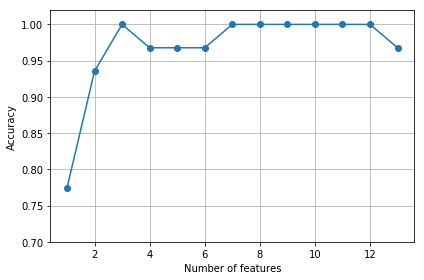

In [42]:
# feat の個数の list (13, 12, ..., 1)
k_feat = [len(k) for k in sbs.subsets_]

# x axis を feat の個数. y axis を score とした line plot
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [43]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [44]:
# 13コすべての feat を用いて, fit model
knn.fit(X_train_std, y_train)

# training accuracy
print('Training accuracy:', knn.score(X_train_std, y_train))

# test accuracy
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.967741935484
Test accuracy: 0.962962962963


In [45]:
# 3つの feat を用いて, fit model
knn.fit(X_train_std[:, k3], y_train)

# training accuracy
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))

# test accuracy
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.951612903226
Test accuracy: 0.925925925926


##### feat selection algo

- feat の weight に基づく, 再帰的な変数減少法
- 重要度にもとづいて, feat を選択する tree base 
- 単変量の統計的検定


- [sklearn: feature selection](http://scikit-learn.org/stable/modules/feature_selection.html)

## 4.6 Assessing feat importance w/ Random Forests

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


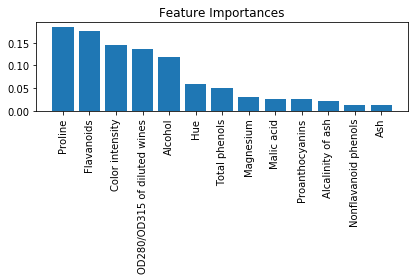

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Wine datasets feat の名称
feat_labels = df_wine.columns[1:]

# randomm forest object の生成 (DTの個数 = 500)
forest = RandomForestClassifier(n_estimators=500, random_state=1)

# fit model
forest.fit(X_train, y_train)

# feat の importance を抽出
importances = forest.feature_importances_

# importance の降順で feat ind を抽出
indices = np.argsort(importances)[::-1]

# importance の降順で feat name, importance を表示
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" %
          (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [47]:
from sklearn.feature_selection import SelectFromModel

# feat selection object を生成 (importance threshold 0.1に設定)
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)

# feat を抽出
X_selected = sfm.transform(X_train)

print('Number of samples that meet this criterion:', X_selected.shape[0])

for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                           feat_labels[indices[f]],
                           importances[indices[f]]))

Number of samples that meet this criterion: 124
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529


**Overview**

- [4.1 Dealing w/ missing data](#4.1-Dealing-w/-missing-data)
    - [4.1.1 Identifying missing values in tabular data](#4.1.1-Identifying-missing-values-in-tabular-data)
    - [4.1.2 Eliminating samples / features w/ missing values](#4.1.2-Eliminating-samples-/-features-w/-missing-values)
    - [4.1.3 Imputing missing val](#4.1.3-Imputing-missing-val)
    - [4.1.4 Understanding the scikit-learn estimator API](#4.1.4-Understanding-the-scikit-learn-estimator-API)
- [4.2 Handling categorical data](#4.2-Handling-categorical-data)
    - [4.2.1 Nominal & ordinal features](#4.2.1-Nominal-&-ordinal-features)
    - [4.2.2 Mapping ordinal feat](#4.2.2-Mapping-ordinal-feat)
    - [4.2.3 Encoding class labels](#4.2.3-Encoding-class-labels)
    - [4.2.4 Performing one-hot encoding on nominal features](#4.2.4-Performing-one-hot-encoding-on-nominal-features)
- [4.3 Partitioning a dataset into a separate training & test set](#4.3-Partitioning-a-dataset-into-a-separate-training-&-test-set)
- [4.4 Bringing feat onto the same scale](#4.4-Bringing-feat-onto-the-same-scale)
- [4.5 Selecting meaningful feat](#4.5-Selecting-meaningful-feat)
    - [4.5.1 L1 & L2 regularization as penalties against model coplexity](#4.5.1-L1-&-L2-regularization-as-penalties-against-model-coplexity)
    - [4.5.2 A geometric interpretation of L2 regularization](#4.5.2-A-geometric-interpretation-of-L2-regularization)
    - [4.5.3 Sparse solutions w/ L1-reguarization](#4.5.3-Sparse-solutions-w/-L1-reguarization)
    - [4.5.4 Sequential feat selection algorithms](#4.5.4-Sequential-feat-selection-algorithms)
- [4.6 Assessing feat importance w/ Random Forests](#4.6-Assessing-feat-importance-w/-Random-Forests)